### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

# Import packages

In [1]:
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

pd.set_option("display.max_columns", None)

In [59]:
#Set the custom color palette
grey, red, blue = "#A9A9A9", "#8B0000", "#6495ED"
sns.set_palette(sns.color_palette([grey, red, blue]))

# Data Cleaning

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Number of unique values in each column
df0.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [6]:
# Unique values in each column
df0.apply(pd.unique)

satisfaction_level       [0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,...
last_evaluation          [0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85...
number_project                                          [2, 5, 7, 6, 4, 3]
average_montly_hours     [157, 262, 272, 223, 159, 153, 247, 259, 224, ...
time_spend_company                               [3, 6, 4, 5, 2, 8, 10, 7]
Work_accident                                                       [0, 1]
left                                                                [1, 0]
promotion_last_5years                                               [0, 1]
Department               [sales, accounting, hr, technical, support, ma...
salary                                                 [low, medium, high]
dtype: object

In [7]:
# Rename columns that are misspelled and make them concise

print(f"➡ Column names before: \n {df0.columns}")
df0.columns = df0.columns.str.lower()
df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                   'number_project':'number_projects',
                   'time_spend_company':'employee_duration'}, inplace=True)

print(f"\n➡ Column names after: \n {df0.columns}")

➡ Column names before: 
 Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

➡ Column names after: 
 Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'employee_duration', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


In [8]:
# Check missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
employee_duration        0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There is no null values in the dataset

In [9]:
# Check duplicates
print(f"➡ Number of duplicated rows: {df0.duplicated().sum()}")
display(df0.loc[df0.duplicated(keep=False)].sort_values(['satisfaction_level','last_evaluation']))

df = df0.drop_duplicates()

print(f"\n➡ The shape of the dataset after dropping duplicates: {df.shape}")

➡ Number of duplicated rows: 3008


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,employee_duration,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
12902,1.00,0.93,5,231,2,0,0,0,marketing,medium



➡ The shape of the dataset after dropping duplicates: (11991, 10)


3008 rows (20%) in the dataset are duplicated rows containing the same values across 10 columns. This is very unlikely that those observations are legitimate. So, dropping those rows is a good solution.

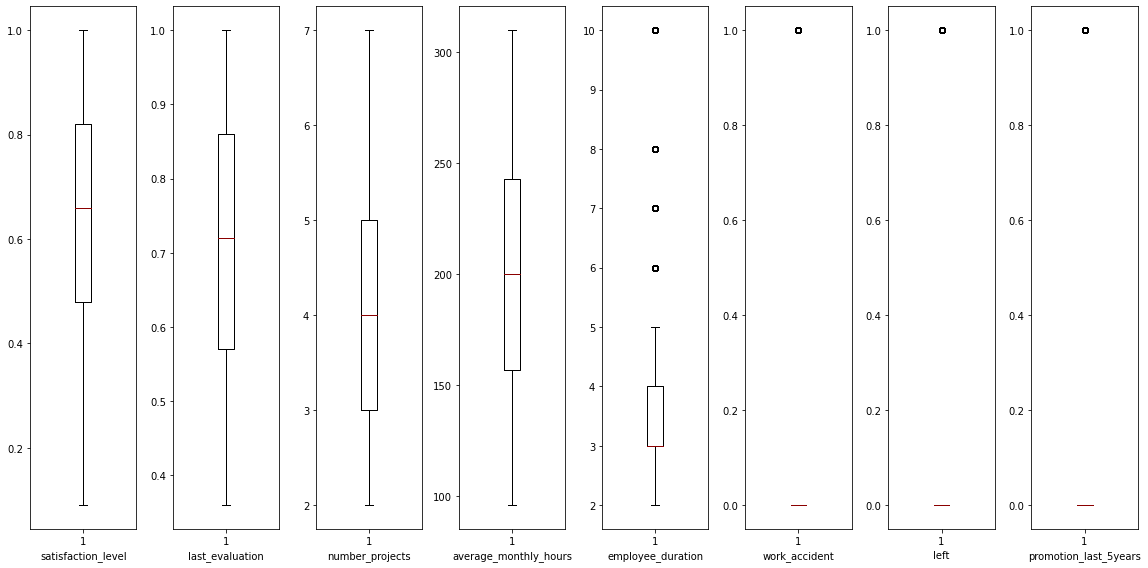

In [10]:
# Check outliers
num_cols = df.select_dtypes(exclude='object').columns
fig, axes = plt.subplots(1, len(num_cols), figsize=(16,8))
for ind, col in enumerate(num_cols):
#     sns.boxplot(y=df1[col], ax=axes[ind])
    axes[ind].boxplot(df[col])
    axes[ind].set_xlabel(col)
fig.tight_layout()

Ignoring the three binary columns `work_acciden`, `left` and `promotion_last_5years`, it looks like only the `employee_duration` column have outliers.

In [11]:
# Check the descriptive statistics of 'employee_duration' column
print(df['employee_duration'].describe())
print()
print
print(df['employee_duration'].value_counts().sort_index())

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: employee_duration, dtype: float64

2     2910
3     5190
4     2005
5     1062
6      542
7       94
8       81
10     107
Name: employee_duration, dtype: int64


In [12]:
# Determine number of rows contating outliers

#25th percentile of 'time_spend_company' column
percentile_25 = np.quantile(df['employee_duration'], 0.25)
#75th percentile of 'time_spend_company' column
percentile_75 = np.quantile(df['employee_duration'], 0.75)
#Interquantile range of 'time_spend_company' column
iqr = percentile_75 - percentile_25
#Upper and Lower limits
upper = percentile_75 + 1.5 * iqr
lower = percentile_25 - 1.5 * iqr
print("Upper limit: ", upper)
print("Lower limit: ", lower)

#Filter outliers
outliers = df.loc[(df['employee_duration'] > upper) | (df['employee_duration'] < lower)]
outliers


Upper limit:  5.5
Lower limit:  1.5


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,employee_duration,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


10 is the maximum number of years that one has been working for the company. The number of people who have been in the company over 6 six is 824 people, which seems reasonable when compared to the others in the entire company. So, outliers seems like not a big impact on the dataset.

# Exploratory Data Analysis

In [13]:
# Number of people who left vs. who stayed
print(df.left.value_counts())
print()

# Percentages of people who left vs. who stayed
df.left.value_counts(normalize=True)

0    10000
1     1991
Name: left, dtype: int64



0    0.833959
1    0.166041
Name: left, dtype: float64

To gain more information from the dataset, examine:
- `average_monthly_hours` distributions for `number_projects`, comparing the distributions of people who stayed vs. who left.
- `average_monthly_hours` vs `satisfaction_level`, comparing people who stayed vs. who left.
- `satisfaction_level` vs `employee_duration`.
- `salary` vs `employee_duration`.
- If there is a correlation between `average_monthly_hours` and `last_evaluation`.
- `average_monthly_hours` vs `promotion_last_5years`.
- Distribution of employees who left across departments.
- If there is multicollinearity between variables in the dataset.


## The distributions of the `average_monthly_hours` variable for per `number_projects` value, compared between people who stayed vs. who left

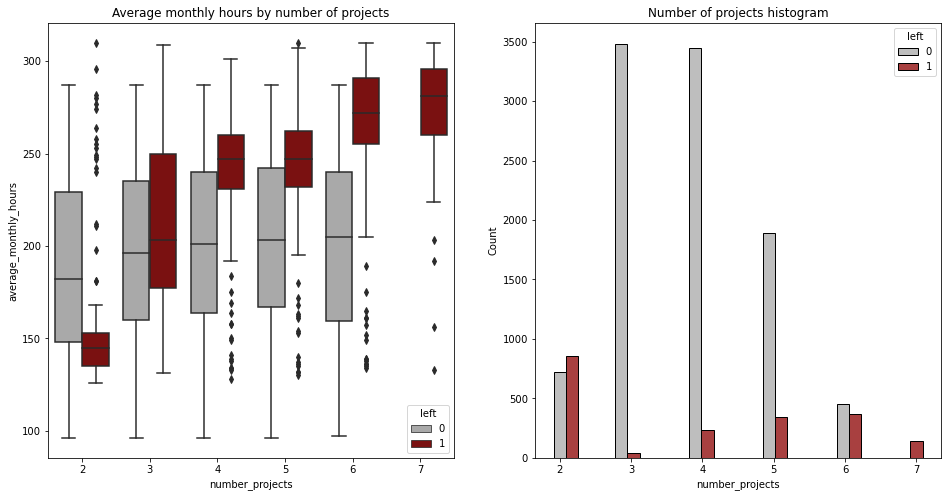

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(data=df, x='number_projects', y='average_monthly_hours', hue='left', ax=axes[0])
axes[0].set_title("Average monthly hours by number of projects")

sns.histplot(data=df, x='number_projects', hue='left', multiple='dodge', shrink=2, ax=axes[1])
axes[1].set_title('Number of projects histogram')

plt.show()

We can see a few things stand out from this plot:
- People who work longer hours also work on more projects.
- Assume an employee work 40 hours per week, then the average number of working hours per month is 160 hours. We can see that the highest number of people who left is when they worked on just two projects. We could assume that they could get fired since they worked on less projects and simultaneously worked significantly shorter hours than their colleages. On the other hand, people who worked on six or seven projects also left a lot since they worked way longer hours than the average hour based on our assumption. It is more likely that they quit because they were overworked.
- All employees who worked on seven projects left the company, and the average monthly hours of this group was about 275 hours per month - which is a lot more than other groups.

In [15]:
# Confirm that all employees with 7 projects left the company
df.query("number_projects == 7")['left'].value_counts()

1    145
Name: left, dtype: int64

We can see that 145 employees with 7 projects left the company.

## The relationship between `average_monthly_hours` and `satisfaction_level`, between people who left vs. who stayed

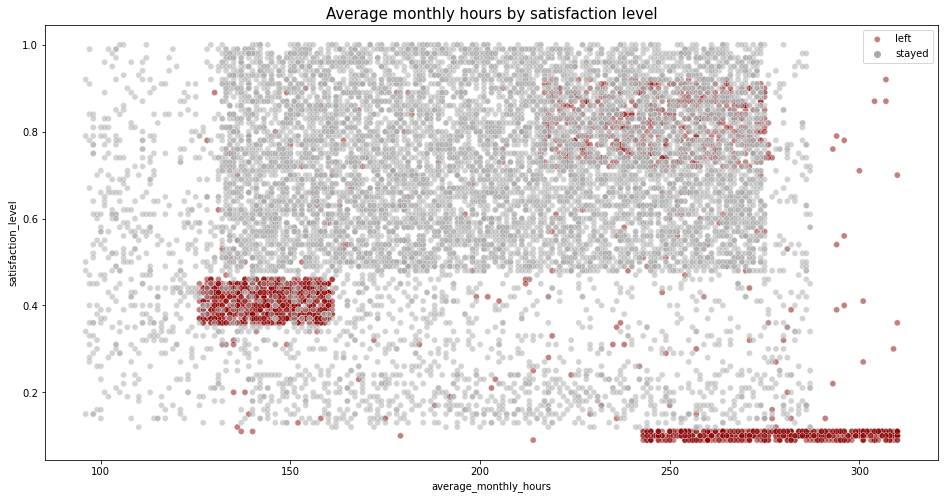

In [16]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.legend(labels=['left', 'stayed'])
plt.title("Average monthly hours by satisfaction level", fontsize=15)
plt.show()

There are three obvious groups of people who left.
- A group of employees who worked from 240 to 320 hours per month. The employees in this group had very low satisfaction level which is about 0.07.
- Another group is employees who work from about 125 to 160 hours per month, which is about normal working hours. Their satisfaction level is about 0.4.
- A less visible group is people who worked from about 215 to 270 hours per month with high satisfaction level ranging from 0.7-0.9.

## The distributions of `satisfaction_level` for each `employee_duration` between people who left vs who stayed

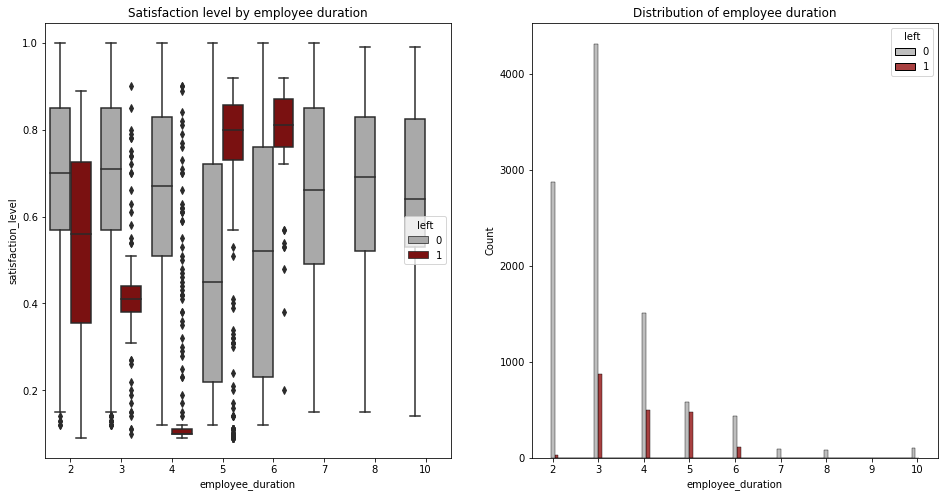

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(data=df, x='employee_duration', y='satisfaction_level', hue='left', ax=ax[0])
ax[0].set_title("Satisfaction level by employee duration")

sns.histplot(data=df, x='employee_duration', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title("Distribution of employee duration")

plt.show()

Some information we can get from this plot:
- Employees who have worked very long in the company did not left.
- Employees who left can be divided into two groups: short-tenure employees who felt dissatified and medium-tenure employees who felt very satisfied with the company.
- Four-year employees who left had very low satisfaction level.

## The difference in `salary` levels for each `employee_duration`

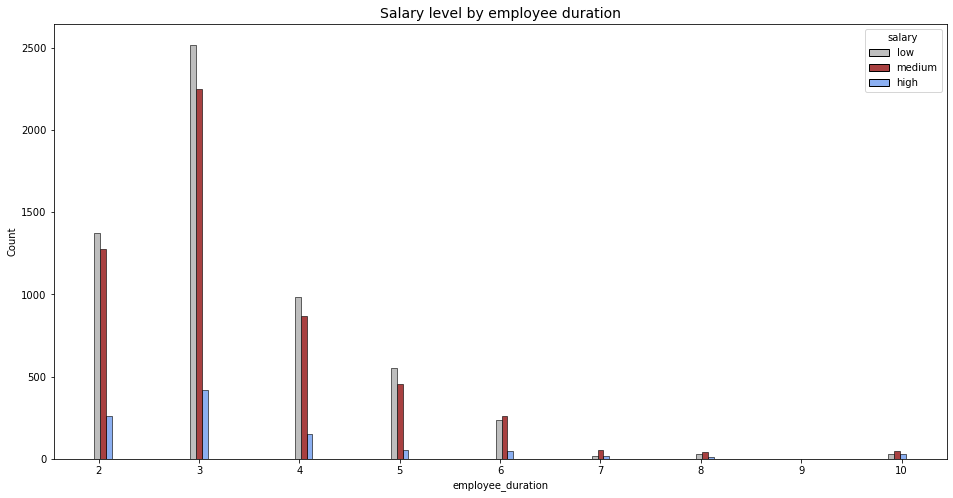

In [18]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='employee_duration', hue='salary', multiple='dodge', shrink=2)
plt.title("Salary level by employee duration", fontsize=14)
plt.show()

This plot shows that employees who have been in the company not too long could also got paid as well as long-tenured employees. Conversely, employees who worked for the company in a long time still had low salary.

## The relationship between `average_monthly_hours` and `last_evaluation`, compared between people who left vs. who stayed

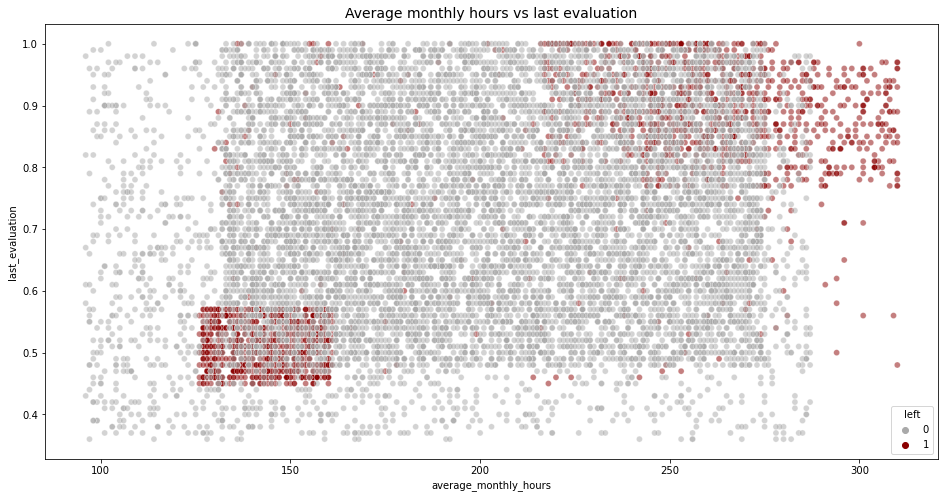

In [19]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=.5)
plt.title("Average monthly hours vs last evaluation", fontsize=14)
plt.show()

- We can see that there are two obvious groups of employees who left: employees who worked short hours and performed not so well with low evaluation scores ranging around 0.5 and employees who worked much longer hours and also performed very well.
- However, there are many people who worked short hours but still performed well, and similarly, a lot of people worked a lot but had lower evaluation scores.

## The number of employees who got promotion in the last five 5 years and its relationship with `average_monthly_hours`

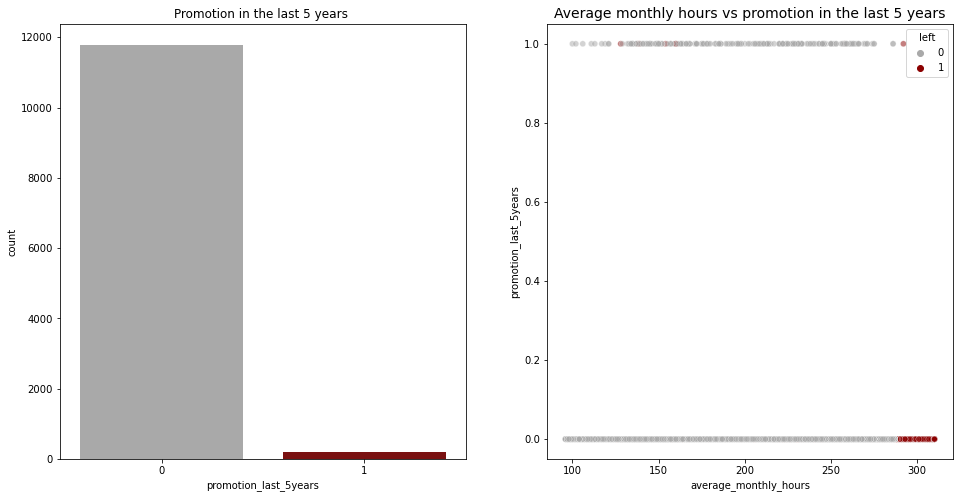

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# df['promotion_last_5years'].value_counts().plot(kind='bar', ax=ax[0], ylabel="Count", xtick=['no promotion', 'promotion'])
sns.countplot(data=df, x='promotion_last_5years', ax=ax[0])
ax[0].set_title("Promotion in the last 5 years ")
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5, ax=ax[1])
ax[1].set_title("Average monthly hours vs promotion in the last 5 years", fontsize=14)
plt.show()

Some observations we can get from the plot:
- Very few employees got promoted in the last 5 years.
- Not many employees who got promoted in the last 5 years left the company.
- Most of employees who left are people who worked long hours and didn't get promoted.

## Distribution of employees who left across `department`

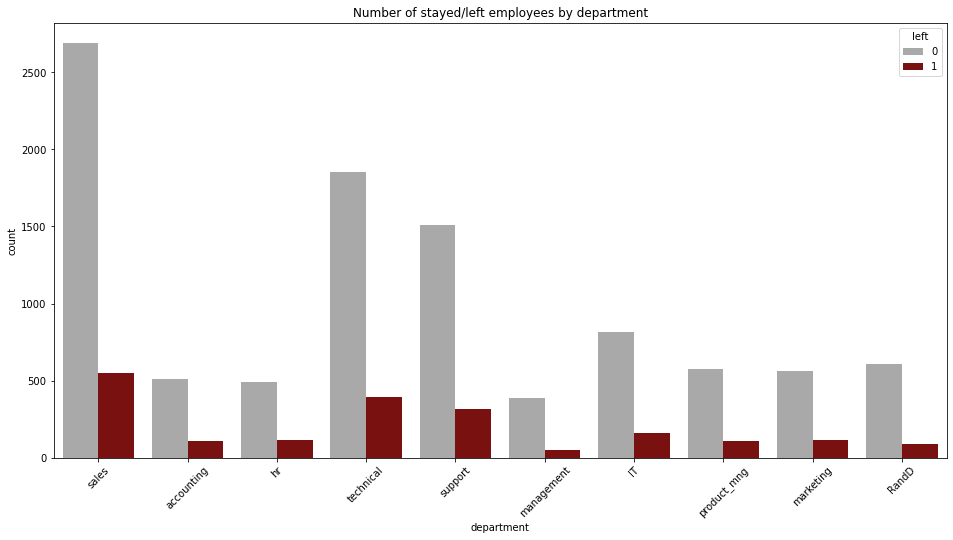

In [21]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='department', hue='left')
plt.title("Number of stayed/left employees by department")
plt.xticks(rotation=45)
plt.show()

There is no significant difference in proportion of employees who left to employees who stayed across all departments.

## Check multicollinearity between predictor variables

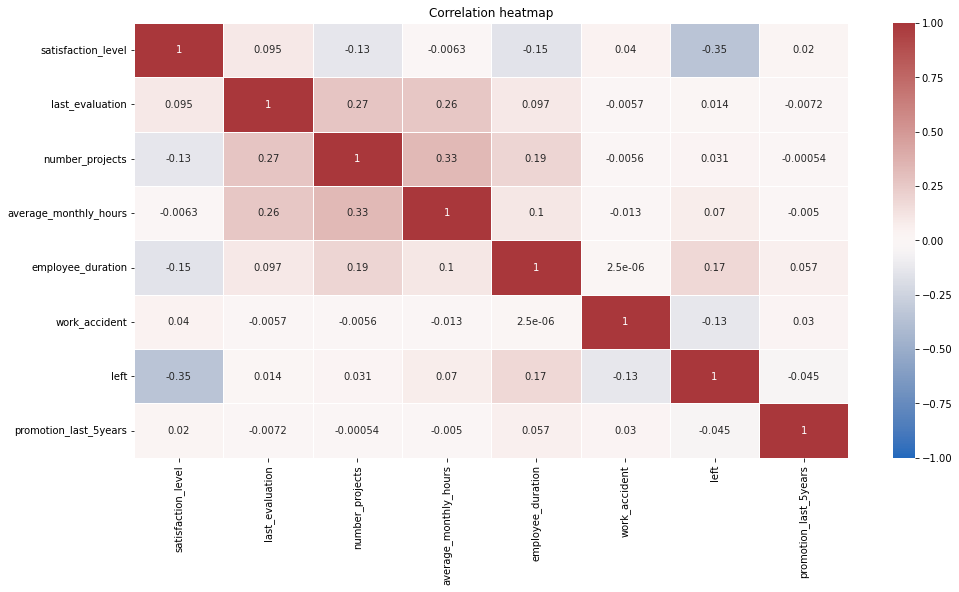

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap=sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1, linewidth=0.5, annot=True)
plt.title('Correlation heatmap')
plt.show()

The correlation heatmap shows that there is no strong correlation between those variables.

# Hypothesis Testing

In [23]:
from scipy import stats

In [24]:
df.groupby('left')['average_monthly_hours'].mean()

left
0    198.94270
1    208.16223
Name: average_monthly_hours, dtype: float64

People who left the company worked about 199 hours per month on average, whereas that number is 208 for people who stayed.

In [25]:
df.groupby('left')['satisfaction_level'].mean()

left
0    0.667365
1    0.440271
Name: satisfaction_level, dtype: float64

It seems like there is a big difference in satisfaction level between people who left and who stayed.

In [26]:
df.groupby('left')['last_evaluation'].mean()

left
0    0.715667
1    0.721783
Name: last_evaluation, dtype: float64

It looks like the average score of the last evaluation is the same between people who left and who stayed

## Is there a difference in average monthly working hours between employees who left vs. who stayed?

**Hypotheses**  
$H_{0}$: There is no difference in average monthly working hours between employee who left and who stayed.  
$H_{1}$: There is a difference in average monthly working hours between employee who left and who stayed.  
  
Choose 5% as the significance level and proceed with a two samples t-test

In [27]:
hours_left = df.query('left == 1')['average_monthly_hours']
hours_stayed = df.query('left == 0')['average_monthly_hours']

t_test = stats.ttest_ind(hours_left, hours_stayed, equal_var=False)
hours_p_val = t_test.pvalue
print(f"p-value: {hours_p_val}")

p-value: 2.2679467569333412e-10


Since the p-value is very much smaller than the choosen significance level (0.05), we can reject the null hypothesis. We can conclude that there is a statistically significant difference between average monthly working hours between people who left the company and who stayed.

## Is there a difference in average satisfaction levels between employee who left vs. who stayed?

**Hypotheses**  
$H_{0}$: There is no difference in average satisfaction levels between employee who left and who stayed.  
$H_{1}$: There is a difference in average satisfaction levels between employee who left and who stayed.  
  
Choose 5% as the significance level and proceed with a two samples t-test

In [28]:
satis_left = df.query('left == 1')['satisfaction_level']
satis_stayed = df.query('left == 0')['satisfaction_level']

t_test = stats.ttest_ind(satis_left, satis_stayed, equal_var=False)
satis_p_val = t_test.pvalue
print(f"p-value: {satis_p_val}")

p-value: 1.193953844039104e-228


The p-value is close to zero, so we can reject the null hypothesis. We can conclude that there is a statistically significant difference between average satisfaction levels between people who left the company and who stayed.

## Is the average score of the last evaluation the same for people who stayed and who lef?

**Hypotheses**  
$H_{0}$: There is no difference in average score of the last evaluation between employee who left and who stayed.  
$H_{1}$: There is a difference in average score of the last evaluation between employee who left and who stayed.  
  
Choose 5% as the significance level and proceed with a two samples t-test

In [29]:
eval_left = df.query('left == 1')['last_evaluation']
eval_stayed = df.query('left == 0')['last_evaluation']

t_test = stats.ttest_ind(eval_left, eval_stayed, equal_var=False)
eval_p_val = t_test.pvalue
print(f"p-value: {eval_p_val}")

p-value: 0.19439069820701232


The p-value is about 0.194 which is larger than the choosen significance level (0.05), we fail to reject the null hypothesis. We can conclude that there is no significant difference in average score of the last evaluation between employees who left and who stayed.

# Data Preprocessing

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,employee_duration,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
# Convert the 'salary' column into ordinal numeric column
df_model = df.copy()
df_model['salary'] = df_model['salary'].map({'low':0, 'medium':1,'high':2})

# Dummy the 'department' column
df_model = pd.get_dummies(df_model)

### Feature extraction

Earlier we assume that the average monthly hours is 160. We can create another variable `overworked` defined as working over 160 hours per month.


In [32]:
df_model['overworked'] = np.where(df_model['average_monthly_hours'] > 160, 1, 0)
df_model['overworked'].value_counts()

1    8696
0    3295
Name: overworked, dtype: int64

# Model preparing

In [33]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import plot_importance

Use four types of model: Logistic Regression, Naive Bayes, Random Forest and XGBoost. Compare their performance using F1 score as the main metric on baseline models and tuned hyperparameter models as well.


In [34]:
df_model['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

The target variable looks imblanced but not too extremely. 

In [35]:
df_model.shape

(11991, 20)

The dataset contains 11991 rows. Split the dataset in the ration 60/20/20 for train/validation/test sets.

In [36]:
# Split the dataset
X = df_model.drop(columns=['left'])
y = df_model['left']

X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.25, random_state=4)

In [37]:
print(f"The shape of X_train: {X_train.shape} and y_train: {y_train.shape}")
print(f"The shape of X_val: {X_val.shape} and y_val: {y_val.shape}")
print(f"The shape of X_test: {X_test.shape} and y_test: {y_test.shape}")

The shape of X_train: (7194, 19) and y_train: (7194,)
The shape of X_val: (2398, 19) and y_val: (2398,)
The shape of X_test: (2399, 19) and y_test: (2399,)


### Custome functions for building model

In [38]:
# Functión to get evalutation scores
def get_evaluation_scores(model_name, model_obj, x_train=X_train, y_train=y_train, x_test=X_val, y_test=y_val):
    """
    Parameters:
        model_name: the name of the model
        model_obj: the model fit object
        x_train: the train set ofthe  predictor variables
        y_train: the train set of the target variable
        x_test: the test set of the predictor variables
        y_test: the test set of the target variable
    Outputs:
        Print out all the evaluation scores.
        Return:
            A list of model_name, accuracy score, precision score, recall score, f1 score, auc score
        
    """
    print("🔴 Model name: ", model_name)
    model = model_obj
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    print(f"{'Accuracy score':>20}: {accuracy_score(y_test, y_pred):.6f}")
    print(f"{'Precision score':>20}: {precision_score(y_test, y_pred):.6f}")
    print(f"{'Recall score':>20}: {recall_score(y_test, y_pred):.6f}")
    print(f"{'F1 score':>20}: {f1_score(y_test, y_pred):.6f}")
    print(f'{"AUC score":>20}: {roc_auc_score(y_test, y_pred_proba):.6f}')
    
    cm = confusion_matrix(y_test, y_pred, labels=model_obj.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=model_obj.classes_)
    disp = disp.plot(cmap=plt.cm.Reds)
    plt.show()
    
    print(classification_report(y_test, y_pred, target_names=['predict stayed', 'predict left']))
    print('-'*100)
    
    return [model_name, accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred), recall_score(y_test, y_pred),
            f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_proba)]

In [39]:
# Funtion to write pickle file
def write_pickle(model_obj, file_name:str):
    """
    Parameters: 
        model_obj: a model you want to save
        file_name: filename of the pickle file
    Return:
        A call to save the model in the current folder
    """
    with open(file_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_obj, to_write)

In [40]:
# Funtion to red pickle file
def read_pickle(saved_file_name:str):
    """
    Parameters: 
        saved_file_name: filename of the pickle file
    Return:
        model: a model that was saved
    """
    with open(saved_file_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

# Model buiding

### Baseline models

In [41]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

🔴 Model name:  Baseline Logistic
      Accuracy score: 0.851960
     Precision score: 0.599078
        Recall score: 0.326633
            F1 score: 0.422764
           AUC score: 0.860501


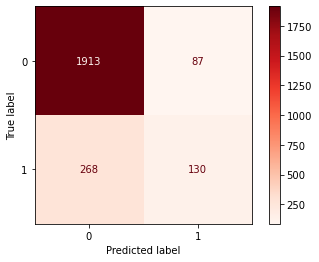

                precision    recall  f1-score   support

predict stayed       0.88      0.96      0.92      2000
  predict left       0.60      0.33      0.42       398

      accuracy                           0.85      2398
     macro avg       0.74      0.64      0.67      2398
  weighted avg       0.83      0.85      0.83      2398

----------------------------------------------------------------------------------------------------
🔴 Model name:  Baseline Naive Bayes
      Accuracy score: 0.799833
     Precision score: 0.430272
        Recall score: 0.635678
            F1 score: 0.513185
           AUC score: 0.816825


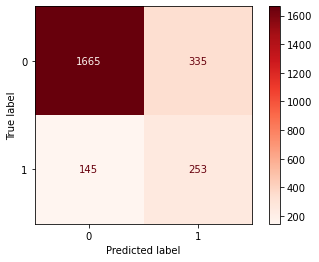

                precision    recall  f1-score   support

predict stayed       0.92      0.83      0.87      2000
  predict left       0.43      0.64      0.51       398

      accuracy                           0.80      2398
     macro avg       0.68      0.73      0.69      2398
  weighted avg       0.84      0.80      0.81      2398

----------------------------------------------------------------------------------------------------
🔴 Model name:  Baseline RandomForest
      Accuracy score: 0.983736
     Precision score: 0.986450
        Recall score: 0.914573
            F1 score: 0.949153
           AUC score: 0.983598


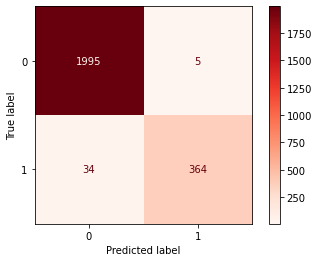

                precision    recall  f1-score   support

predict stayed       0.98      1.00      0.99      2000
  predict left       0.99      0.91      0.95       398

      accuracy                           0.98      2398
     macro avg       0.98      0.96      0.97      2398
  weighted avg       0.98      0.98      0.98      2398

----------------------------------------------------------------------------------------------------
🔴 Model name:  Baseline XGB
      Accuracy score: 0.983319
     Precision score: 0.973545
        Recall score: 0.924623
            F1 score: 0.948454
           AUC score: 0.986692


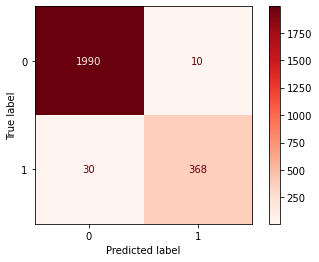

                precision    recall  f1-score   support

predict stayed       0.99      0.99      0.99      2000
  predict left       0.97      0.92      0.95       398

      accuracy                           0.98      2398
     macro avg       0.98      0.96      0.97      2398
  weighted avg       0.98      0.98      0.98      2398

----------------------------------------------------------------------------------------------------


In [42]:
models = {"Baseline Logistic": LogisticRegression(random_state=42, max_iter=500),
         "Baseline Naive Bayes": GaussianNB(),
         "Baseline RandomForest": RandomForestClassifier(random_state=42),
         "Baseline XGB": XGBClassifier(random_state=42, objective="binary:logistic", use_label_encoder=False, eval_metric='mlogloss')}
for model_name, model_obj in models.items():
    res = get_evaluation_scores(model_name, model_obj)
    results.loc[len(results)] = res

In [43]:
results 

,Model,Accuracy,Precision,Recall,F1,AUC
0,Baseline Logistic,0.851960,0.599078,0.326633,0.422764,0.860501
1,Baseline Naive Bayes,0.799833,0.430272,0.635678,0.513185,0.816825
2,Baseline RandomForest,0.983736,0.986450,0.914573,0.949153,0.983598
3,Baseline XGB,0.983319,0.973545,0.924623,0.948454,0.986692


Of four models, the evaluation scores of RandomForest and XGBoost are way better than Logistic and Naive Bayes. However, their performance are too good for a baseline model. They have kind of abnormally high evaluation scores.

Next, we'll check how those two model perform which tuned hyperparameters.

### Tuned hyperparameter models

#### Random Forest

In [44]:
# cv_params = {'max_depth': [3,5, None], 
#              'max_features': [1, 2],
#              'max_samples': [0.7, 1],
#              'min_samples_leaf': [1,2,3],
#              'min_samples_split': [2,3,4],
#              'n_estimators': [300, 500],
#              } 
# scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# rf = RandomForestClassifier(random_state=42)

# rf_cv = RandomizedSearchCV(rf, cv_params, refit='roc_auc', scoring=scoring, cv=4)

In [45]:
# %%time
# rf_cv.fit(X_train, y_train)

In [46]:
# # Write pickle
# write_pickle(rf_cv, 'rf_cv_model')

In [47]:
# Read pickle
rf_cv = read_pickle('rf_cv_model')

🔴 Model name:  Tuned RandomForest


C:\Users\hoang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hoang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hoang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hoang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

      Accuracy score: 0.978732
     Precision score: 0.980609
        Recall score: 0.889447
            F1 score: 0.932806
           AUC score: 0.983345


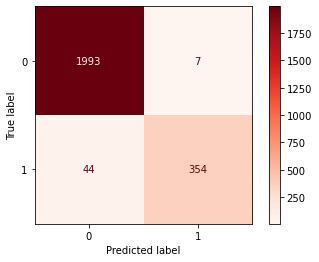

                precision    recall  f1-score   support

predict stayed       0.98      1.00      0.99      2000
  predict left       0.98      0.89      0.93       398

      accuracy                           0.98      2398
     macro avg       0.98      0.94      0.96      2398
  weighted avg       0.98      0.98      0.98      2398

----------------------------------------------------------------------------------------------------


,Model,Accuracy,Precision,Recall,F1,AUC
0,Baseline Logistic,0.851960,0.599078,0.326633,0.422764,0.860501
1,Baseline Naive Bayes,0.799833,0.430272,0.635678,0.513185,0.816825
2,Baseline RandomForest,0.983736,0.986450,0.914573,0.949153,0.983598
3,Baseline XGB,0.983319,0.973545,0.924623,0.948454,0.986692
4,Tuned RandomForest,0.978732,0.980609,0.889447,0.932806,0.983345


In [48]:
rf_cv_scores = get_evaluation_scores("Tuned RandomForest", rf_cv)
results.loc[len(results)] = rf_cv_scores
results

#### XGBoost

In [49]:
# cv_params = {'max_depth': [4, 6, None],
#               'min_child_weight': [2, 3, 5],
#               'learning_rate': [0.01, 0.1, 0.2, 0.3],
#               'n_estimators': [5,10,15],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7]
#               }

# scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# xgb = XGBClassifier(random_state=42, objective="binary:logistic", use_label_encoder=False, eval_metric='mlogloss')

# xgb_cv = GridSearchCV(xgb, cv_params, refit='roc_auc', scoring=scoring, cv=4)

In [50]:
# %%time 
# xgb_cv.fit(X_train, y_train)

In [51]:
# # Write pickle
# write_pickle(xgb_cv, 'xgb_cv_model')

In [52]:
# Read pickle
xgb_cv = read_pickle('xgb_cv_model')

🔴 Model name:  Tuned XGB
      Accuracy score: 0.982068
     Precision score: 0.965879
        Recall score: 0.924623
            F1 score: 0.944801
           AUC score: 0.986098


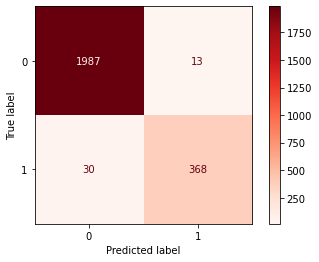

                precision    recall  f1-score   support

predict stayed       0.99      0.99      0.99      2000
  predict left       0.97      0.92      0.94       398

      accuracy                           0.98      2398
     macro avg       0.98      0.96      0.97      2398
  weighted avg       0.98      0.98      0.98      2398

----------------------------------------------------------------------------------------------------


,Model,Accuracy,Precision,Recall,F1,AUC
0,Baseline Logistic,0.851960,0.599078,0.326633,0.422764,0.860501
1,Baseline Naive Bayes,0.799833,0.430272,0.635678,0.513185,0.816825
2,Baseline RandomForest,0.983736,0.986450,0.914573,0.949153,0.983598
3,Baseline XGB,0.983319,0.973545,0.924623,0.948454,0.986692
4,Tuned RandomForest,0.978732,0.980609,0.889447,0.932806,0.983345
5,Tuned XGB,0.982068,0.965879,0.924623,0.944801,0.986098


In [53]:
xgb_cv_scores = get_evaluation_scores("Tuned XGB", xgb_cv)
results.loc[len(results)] = xgb_cv_scores
results

- For the RandomForest model, the evaluation scores of the baseline model is slightly higher that those of the tuned model. However, their Recall score are a little more different than other scores.
- At the same time, the evaluation scores of both tuned and baseline XGB models remain almost the same.

I decide to choose the baseline XGB as the champion model for the test set. 

In [54]:
xgb = models['Baseline XGB']

🔴 Model name:  Baseline XGB test
      Accuracy score: 0.982076
     Precision score: 0.963446
        Recall score: 0.927136
            F1 score: 0.944942
           AUC score: 0.982420


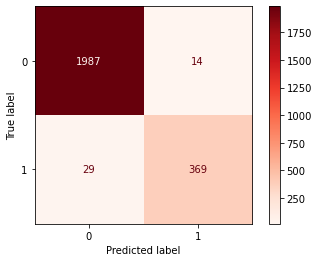

                precision    recall  f1-score   support

predict stayed       0.99      0.99      0.99      2001
  predict left       0.96      0.93      0.94       398

      accuracy                           0.98      2399
     macro avg       0.97      0.96      0.97      2399
  weighted avg       0.98      0.98      0.98      2399

----------------------------------------------------------------------------------------------------


In [55]:
xgb_test = get_evaluation_scores('Baseline XGB test', xgb, x_test=X_test, y_test=y_test)
test_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
test_results.loc[len(test_results)] = xgb_test

In [56]:
scores = test_results
print(scores)
scores = scores.drop(columns='Model')
scores = scores.melt(var_name='score_names', value_name='score').sort_values('score', ascending=False).reset_index(drop=True)
scores

               Model  Accuracy  Precision    Recall        F1      AUC
0  Baseline XGB test  0.982076   0.963446  0.927136  0.944942  0.98242


,score_names,score
0,AUC,0.982420
1,Accuracy,0.982076
2,Precision,0.963446
3,F1,0.944942
4,Recall,0.927136


The baseline XGB model gives a high performance on the test set with the AUC score of 0.982. The model predicts more False Negative than False Positive, but the number of wrong predictions are so small compared to the whole test set. So, this is still as strong model.

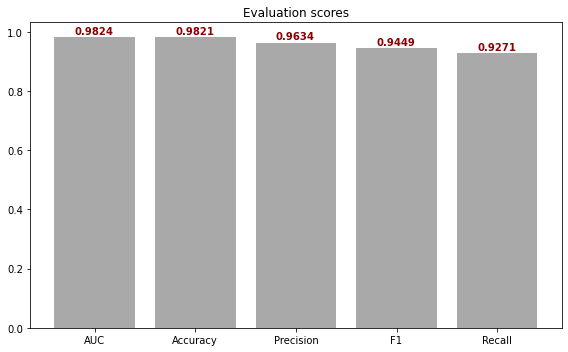

In [63]:
plt.figure(figsize=(8,5), tight_layout=True)
plt.bar(scores['score_names'], scores['score'])
plt.title("Evaluation scores")
for i in range(scores.shape[0]):
    plt.text(i - 0.2, scores.loc[i, 'score'] + 0.01, str(scores.loc[i, 'score'].round(4)), weight='bold', color=red)
# plt.savefig("evaluation_scores.jpg", bbox_inches='tight', dpi=150)
plt.show()


### XGB feature importance

<Figure size 576x360 with 0 Axes>

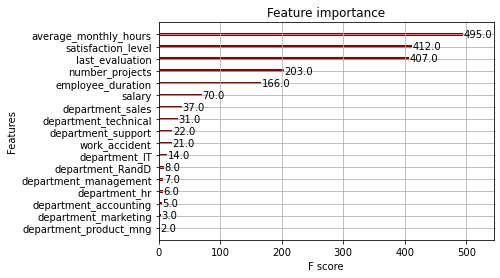

In [58]:
plt.figure(figsize=(8,5), tight_layout=True)
sns.set_palette(sns.color_palette(["#8B0000"]))
plot_importance(xgb)
# plt.savefig('feature_importance.jpg', bbox_inches='tight', dpi=150)
plt.show()

The plot shows that in the baseline XGB model, `avarage_monthly_hours`, `satisfaction_level` and `last_evaluation` have the highest importance in the respective order. They are the most valuable variables in predicting the target variable `left`.

# Summary

- After running 4 types of models, LosgicticRegression, Naives Bayes, RandomForest and XGBooost, we can see that RandomForest and XGBoos outperformed the other two models. Also, XGBoost had evenly better evaluation scores than RandomForest did.
- The baseline XGBoost model achieved AUC of 98.2%, accuracy of 98.2%, precision of 96.3%, recall of 92.7% and f1-score of 94.5% on the test set. These are pretty high scores indicating that the model is strong.
- `avarage_monthly_hours`, `satisfaction_level` and `last_evaluation` are significantly important for the model in predicting employees who are most likely to leave the company.